In [ ]:
from sklearn.datasets import fetch_openml


In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
# print(mnist)

x, y= mnist['data'], mnist['target']

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
some_digit = x.iloc[36001]
some_digit_image = some_digit.values.reshape(28,28) #reshaped to 28x28 grid format so that it can be displayed or further processed as a proper image.

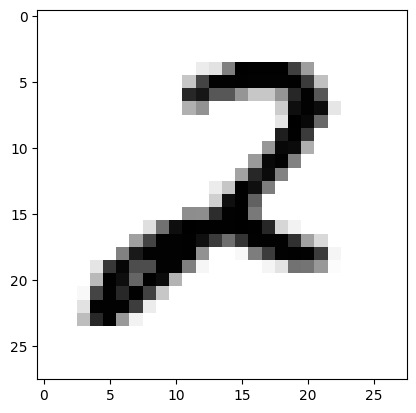

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [ ]:
y[36000]

'9'

In [ ]:
#we need to keep training set aside and not see it again, why?
#becoz - as we'll make any type of algorithm, will do some kind of training, and then will come to a conclusion that we'll use logistic Regression or Stochastic GD classifier, or SVM etc.
# and will see how my algorithm is performing on test set.
#One advantage here is that, MNIST data set is already being split in training and testing,, first 60k:training, rest:testing

In [ ]:
X_train, X_test = x[:60000],x[60000:] #put first 60k in train, and after 60 in test

In [ ]:
#now same for y
y_train, y_test = y[:60000],y[60000:]

In [ ]:
#now doing shuffling
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

creating a 2 detector : check whether a digit is 2 or not

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2) # Changed '2' to 2
y_test_2 = (y_test == 2) # Changed '2' to 2

In [ ]:
y_train

,class
23497,5
53842,1
51406,6
31387,7
58187,9
...,...
18033,6
28850,6
42387,5
25149,8


In [ ]:
#now less put a classfier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# Check if both classes are present in the training set:

if not y_train_2.any():  # Check if any True values exist
    print("Error: No samples of class '2' found in the training set.")  # This is a custom error message to help debug
else:
    clf.fit(X_train, y_train_2)  # Only fit the model if both classes are present

#why we didn't use y_train?
#used y_train2 instead of y_train because we're building a binary classifier –
#a model that only distinguishes between two classes: "2" and "not 2".

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf.predict([some_digit])
#means the image which was shown earlier is 2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

output  - array([True])

means the image which was shown earlier is 2


In [ ]:
#But now we'll do cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, X_train, y_train_2, cv=5, scoring="accuracy")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.97765, 0.97785, 0.9789 ]) output for cv=2:

means our accuracy is quite high which is good

In [ ]:
a

array([0.98025, 0.97975, 0.97875, 0.9775 , 0.97875])

In [ ]:
a.mean()

0.9789999999999999

In [ ]:
#Note - Accuracy is not a good metric to evaluate classifier